# NVCL Spectral Log Notebook

This notebook demonstrates on how you can query NVCL Dataservices and display a plot of a spectral reflectance log

Adapted from Selvaraju Venkataraman's notebook: https://github.com/VenkataramananSelvaraju/nvcl-notebooks/blob/master/NVCL_Dataservices_Notebook.ipynb


In [1]:
from nvcl_kit.reader import NVCLReader 
from nvcl_kit.param_builder import param_builder
from types import SimpleNamespace

# Build parameters for South Australia's NVCL Services 
param = param_builder('sa', max_boreholes=23)
if not param:
    print("Cannot build parameters for South Australia")

# Connect to SA NVCL Services
reader = NVCLReader(param)
if not reader.wfs:
    print("ERROR! Cannot connect to South Australia NVCL Services")

In [2]:
import xmltodict
import pandas as pd

data = []
response_str = reader.svc.get_dataset_collection('all', headersonly='yes')
dataset_obj = xmltodict.parse(response_str)["DatasetCollection"]["Dataset"]
for dataset_dict in (dataset_obj if type(dataset_obj) is list else [dataset_obj]):
    borehole_id = dataset_dict['boreholeURI'].rsplit('/', 1).pop()
    dataset_dict.update({'boreholeId':borehole_id})
    data.append(dataset_dict)

selected_rows_df = pd.DataFrame(data)
selected_rows_df


,DatasetID,boreholeURI,DatasetName,description,trayID,sectionID,domainID,boreholeId
0,0f18fe0f-9e34-444c-889e-29eef09d370,https://sarigdata.pir.sa.gov.au/nvcl/resource/...,129520_Yalkalpo1,"<?xml version=""1.0"" encoding=""utf-8""?><TSGDril...",73f40c76-8b24-45ed-b8e1-73f9e39ca9b,0f3ac507-f3f7-472d-a82c-e6b8933e8db,c6e8e668-ad56-4c59-b03a-e0eaabfd035,129520
1,54ff4dad-1234-497c-b236-738e9c817c6,https://sarigdata.pir.sa.gov.au/nvcl/resource/...,237074_MRK003,"<?xml version=""1.0"" encoding=""utf-8""?><TSGDril...",eb3e798f-be9b-4795-a4f1-2cb684c4264,6365ee75-e4b7-43ce-a057-5ab56d8724b,a60c735a-2bcf-4131-b2bb-7fe14fc8666,237074
2,5a2dc247-aa15-4b66-ab4f-e6ea3c001a5,https://sarigdata.pir.sa.gov.au/nvcl/resource/...,20723 ASD2,"<?xml version=""1.0"" encoding=""utf-8""?><TSGDril...",2735dba9-f0aa-4f1c-8f81-841bf86b8ff,098b396d-c2e8-44b5-b361-d2f84aec5e6,dc07224f-ff4e-47be-ac6d-11770259b77,20723
3,22670598-08c2-4c85-9bd7-35a375246e8,https://sarigdata.pir.sa.gov.au/nvcl/resource/...,131076_WS-WB,"<?xml version=""1.0"" encoding=""utf-8""?><TSGDril...",8a607ed2-5aee-4b4a-8af9-2bd0d5db74a,28ef03d4-d3b7-4491-ba40-2003f7598fb,e5f55568-802d-450b-afa0-96199c79846,131076
4,a41bb0fa-ba8c-44b9-a600-fc5f835a456,https://sarigdata.pir.sa.gov.au/nvcl/resource/...,139511 PUB42_SAU28,"<?xml version=""1.0"" encoding=""utf-8""?><TSGDril...",8a14052e-8bc7-4dcc-9793-8f89844eff1,112d6288-ed0e-4547-953b-3e4be0a45e5,3fe7db3c-d3ae-46d3-8cac-57e3625d09b,139511
...,...,...,...,...,...,...,...,...
1349,97b5e143-fba4-4092-bbe7-0dee2d5e821,https://sarigdata.pir.sa.gov.au/nvcl/resource/...,162429_RD502,"<?xml version=""1.0"" encoding=""utf-8""?><TSGDril...",b9671eac-9d65-49e1-a94b-a181e44a57e,b1add966-f37d-4b8c-89d8-32ccb48b931,56c2a96d-3735-430c-b1e0-8946a7d2be7,162429
1350,95c9c240-e8e6-48c4-8f7c-4e38fbfc4d9,https://sarigdata.pir.sa.gov.au/nvcl/resource/...,162430_RD503,"<?xml version=""1.0"" encoding=""utf-8""?><TSGDril...",ee5180eb-489f-4dc9-b2ca-798b7f40fed,919f24c1-54e3-498d-a9d4-d90847c5e6a,9101c1c7-724f-4b06-9b55-b2df053934a,162430
1351,ce04e50f-332b-401d-b66c-c9cc1f8eb5e,https://sarigdata.pir.sa.gov.au/nvcl/resource/...,327317_RD20W1,"<?xml version=""1.0"" encoding=""utf-8""?><TSGDril...",51279afc-3563-4872-ae9d-ba7ec15e901,d4455307-30d9-4256-8ac1-9909262942e,3f4332a5-69ef-4148-8895-bc6960b62f9,327317
1352,ce67271b-696c-443f-a0a6-79e2595eb93,https://sarigdata.pir.sa.gov.au/nvcl/resource/...,327319_RD26,"<?xml version=""1.0"" encoding=""utf-8""?><TSGDril...",59d0e5e9-26e5-41de-a86d-f53388c3901,754c381b-dc60-4b90-acaa-a535f6e97b3,cc334ca3-0d58-4855-8463-2f10f8148cc,327319


### Run cell below, then select a dataset

In [3]:
from ipywidgets import Dropdown, Layout, HTML, interact
from IPython.display import display_html

# A dropdown of dataset names, sorted A->Z
dataset_dd = Dropdown(
    options = sorted(list(zip(selected_rows_df['DatasetName'], selected_rows_df['DatasetID']))),
    value = selected_rows_df['DatasetID'].values[0],
    description = 'Select:',
    layout = Layout(margin='20px')
)

# Use 'get_tray_thumb_imglogs' and 'get_mosaic_image' to get HTML display of core trays
imglogs = reader.get_tray_thumb_imglogs(selected_rows_df['DatasetID'].values[0])
mosaic_html = reader.get_mosaic_image(imglogs[0].log_id)
html = HTML(data=mosaic_html)

# Forces update of the HTML
@interact(dataset_dd = dataset_dd, html = html)
def update(dataset_dd, html):
  imglogs = reader.get_tray_thumb_imglogs(dataset_dd)
  mosaic_html = reader.get_mosaic_image(imglogs[0].log_id)
  html = HTML(value=mosaic_html)
  display_html(html)


interactive(children=(Dropdown(description='Select:', index=36, layout=Layout(margin='20px'), options=(('10133…

<AxesSubplot:title={'center':'129520_Yalkalpo1'}, xlabel='wavelengths'>

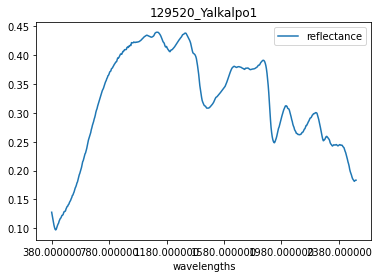

In [4]:
import xmltodict
import array

spectral_data_df = selected_rows_df.loc[selected_rows_df['DatasetID'] == dataset_dd.value]
response_str = reader.svc.get_dataset_collection(spectral_data_df['boreholeId'].values[0], 
                    datasetid=spectral_data_df['DatasetID'].values[0])
spectral_logs_obj = xmltodict.parse(response_str)['DatasetCollection']['Dataset']['SpectralLogs']['SpectralLog']

# Make a dataframe of spectral log data
data = []
for spectral_logs_dict in (spectral_logs_obj if type(spectral_logs_obj) is list else [spectral_logs_obj]):
    data.append(spectral_logs_dict)
spectral_logs_df = pd.DataFrame(data)

# Pull out reflectance data from dataframe
reflectance_df = spectral_logs_df.loc[spectral_logs_df['logName'] == 'Reflectance']

# Use 'get_spectrallog_datasets' to get spectral log data
spec_data = reader.get_spectrallog_datasets(reflectance_df['logID'].values[0], end_sample_no='1', start_sample_no='1')
U = array.array("f")
U.fromstring(spec_data)
spec_data = {'reflectance': U}
wvl_data = {'wavelengths' : reflectance_df['wavelengths'].values[0].split(',')}
spect_df = pd.concat([pd.DataFrame(wvl_data), pd.DataFrame(spec_data)], axis=1, sort=False)
spect_df.plot(kind='line', x='wavelengths', y='reflectance', title=spectral_data_df["DatasetName"].tolist()[0])